In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [6]:
#reading hackathon_working_data

df = pd.read_csv("/kaggle/input/store-transaction-data/Hackathon_Ideal_Data.csv") 
df.head(15)


,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS
5,M1,P2,1,90,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE DAILY SHINE
6,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE ENVIRONMENTAL DEFENCE
7,M1,P2,10,34,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
8,M1,P2,11,37,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
9,M1,P2,2,7,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE


In [7]:
print(df.describe())

                QTY         VALUE
count  14260.000000  14260.000000
mean      16.354488    294.455330
std       34.365583    760.129558
min        0.000000      0.000000
25%        1.000000     10.000000
50%        4.000000     99.000000
75%       16.000000    283.000000
max      641.000000  24185.000000


In [8]:
#counting the null counts

null_counts =df.isnull().sum()
print(null_counts)

MONTH        0
STORECODE    0
QTY          0
VALUE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64


In [17]:
df_filled = df.fillna(0)
df_filled.to_csv('filled_file.csv', index=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


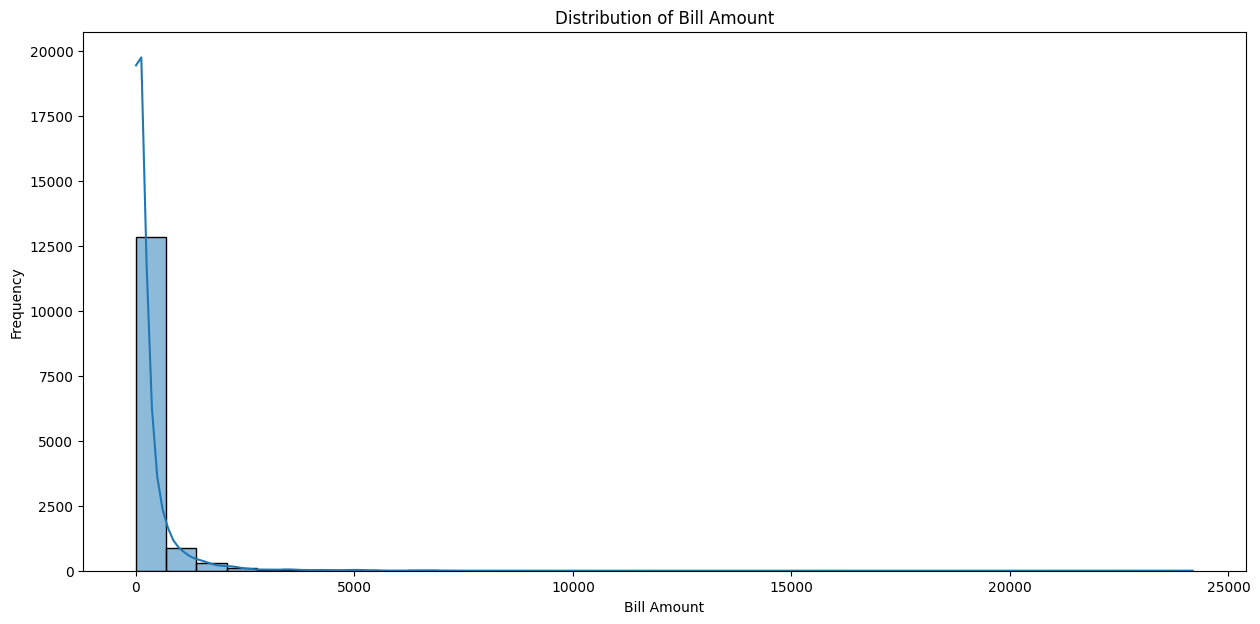

In [21]:
plt.figure(figsize=(15, 7))

sns.histplot(df['VALUE'], bins=35, kde=True)

plt.title('Distribution of Bill Amount')

plt.xlabel('Bill Amount')

plt.ylabel('Frequency')

plt.show()

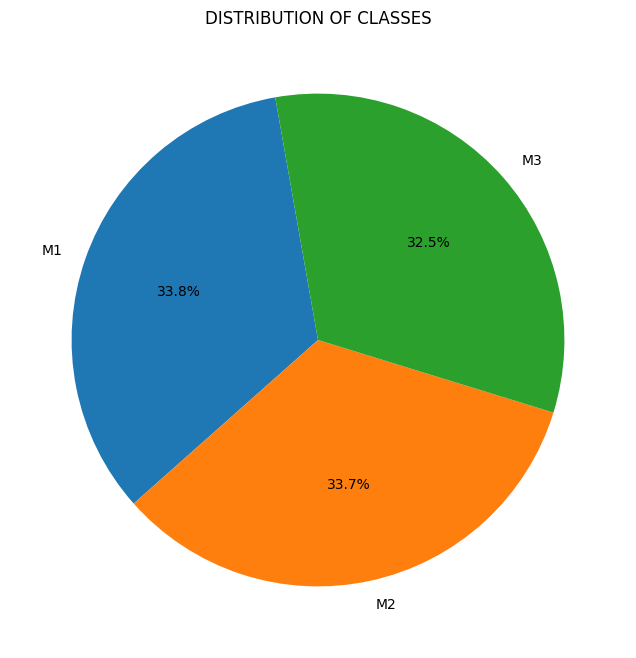

In [31]:
labels=['M1','M2','M3']
label_counts=df['MONTH'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%',startangle=100)
plt.title('DISTRIBUTION OF CLASSES')
plt.show()

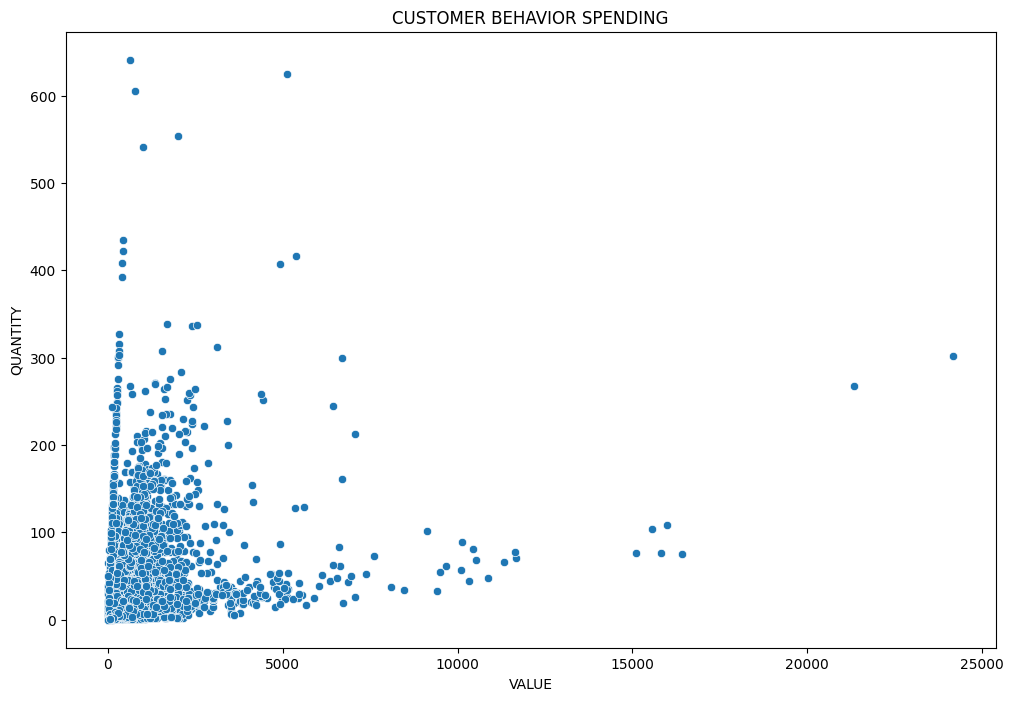

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='VALUE', y='QTY', data=df)
plt.title('CUSTOMER BEHAVIOR SPENDING')
plt.xlabel('VALUE')
plt.ylabel('QUANTITY')
plt.show()

In [34]:
month_dummies = pd.get_dummies(df['MONTH'])
month_dummies.head(8)

,M1,M2,M3
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,True,False,False
6,True,False,False
7,True,False,False


In [36]:
plt.figure(figsize=(150, 60))
sns.countplot(x='GRP', data=df, palette='viridis')
plt.title('Transaction Count by Product Group', fontsize=18)
plt.xlabel('Product Group', fontsize=100)
plt.ylabel('Transaction Count', fontsize=100)
plt.xticks(rotation=45, ha='right', fontsize=50) 

plt.yticks(fontsize=50) 
plt.show()